# Linear Regression Assignment - Bike Sharing Case Study
## Contributor: Debarshi Chakraborty
### 13-Mar-2023
### EPGP in ML & AI - December 2022 batch

#### Problem Statement
> A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

> A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

> In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


> They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

> **Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors**. 


#### Business Goal:
> *You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market*. 

In [75]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

### Importing the Data CSV and performing initial walkthrough

In [134]:
# importing libraries for EDA, plotting and Linear Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
#for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
#for calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [135]:
# importing the data
# file needs to be in the same path as this code file
rawdata = pd.read_csv('day.csv')

In [136]:
rawdata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [137]:
# checking the shape
rawdata.shape

(730, 16)

In [138]:
# basic description of the dataset

rawdata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [139]:
# basic info of the dataset

rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


---
#### First Impression of the Dataset
	1. Dataset has 730 rows and 16 columns
    2. Except one, all other columns are numeric types
    3. Some of the columns apepar to be categorical and thus needs to be casted as required for further analysis
---

### Data Cleaning

In [140]:
rawdata.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

---
#### Dropping of unwanted columns
- **instant** : Its only an index value.
- **dteday** : This has the date, Since we already have seperate columns for 'year', 'month', 'weekday' hence, we could live without this column.
- **casual & registered** : Both these columns contains the count of bike booked by different categories of customers. Since **cnt** is our targt variable and is a sum of casual and registered, we will ignore these two columns.
---

In [141]:
cleanset=rawdata[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [142]:
cleanset.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [143]:
cleanset.shape

(730, 12)

### EXPLORATORY DATA ANALYSIS

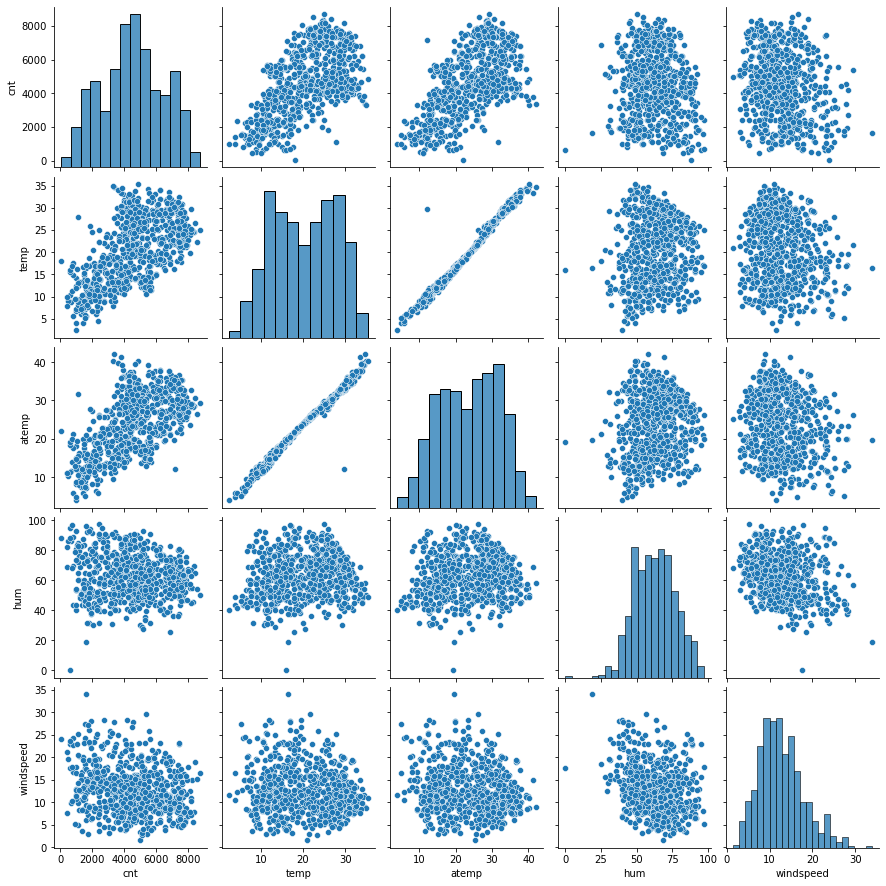

In [144]:
# doing a pairplot for the non-categorical data 
explore_noncat = cleanset[[ 'cnt','temp', 'atemp', 'hum', 'windspeed']]
sns.pairplot(explore_noncat)
plt.show()

---
#### Insight
- *The above Pair-Plot tells us that there is a LINEAR RELATION between*  ***cnt, temp*** *and* ***atemp***.
- *The above Pair-Plot tells us that ***temp*** and ***atemp*** is strongly related (almost a straight line)*.
---

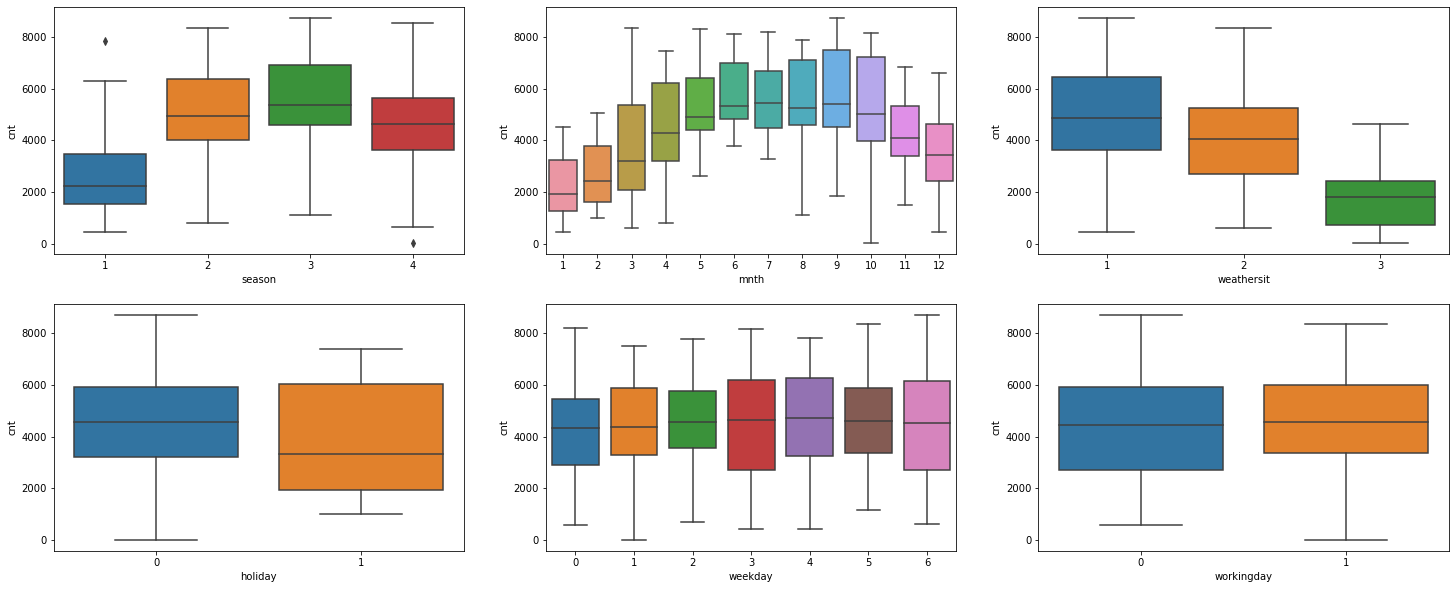

In [145]:
# doing a visualization for the categorical data 
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = cleanset)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = cleanset)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = cleanset)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = cleanset)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = cleanset)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = cleanset)
plt.show()

---
#### Insight
- ***season***: *the box plot indicates, season can be a good predictor for the dependent variable*.

- ***mnth***: *The plot indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable*.

- ***weathersit***: *weathersit does show some trend towards the bike bookings and can be a good predictor for the dependent variable*.

- ***weekday***: *weekday variable shows their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. We will keep it for analysis using the model*.

- ***holiday***: *does not show much of variation whether it's a holiday or not. Could be a biased variable and also we have an complementing working day predictor. Thus we will keep the working day for analysis and drop the holiday*.

- ***workingday***: *As stated above, we will use the model to suggest the suitability of this variable*
---

In [146]:
# dropping the holiday field
cleanset = cleanset[['season', 'yr', 'mnth', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]
cleanset.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


---
#### Creating dummy variables for the categorical data
- **mnth** : Value ranges from 1 to 12, representing each month of the year. 1 being January.
- **weekday** : Value ranges from 0 to 6, representing the 7 days of week. 0: Sunday --> 6: Saturday
- **season** : Value ranges from 1 to 4. (1:spring, 2:summer, 3:fall, 4:winter)
- **weathersit** : Value ranges from 1 to 3. As per DD:
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
---

In [147]:
# Convert to 'category' data type

cleanset['season']=cleanset['season'].astype('category')
cleanset['weathersit']=cleanset['weathersit'].astype('category')
cleanset['mnth']=cleanset['mnth'].astype('category')
cleanset['weekday']=cleanset['weekday'].astype('category')

In [148]:
cleanset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   weekday     730 non-null    category
 4   workingday  730 non-null    int64   
 5   weathersit  730 non-null    category
 6   temp        730 non-null    float64 
 7   atemp       730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(3)
memory usage: 44.0 KB


In [149]:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.

cleanset = pd.get_dummies(cleanset, drop_first=True)
cleanset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   workingday    730 non-null    int64  
 2   temp          730 non-null    float64
 3   atemp         730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   season_2      730 non-null    uint8  
 8   season_3      730 non-null    uint8  
 9   season_4      730 non-null    uint8  
 10  mnth_2        730 non-null    uint8  
 11  mnth_3        730 non-null    uint8  
 12  mnth_4        730 non-null    uint8  
 13  mnth_5        730 non-null    uint8  
 14  mnth_6        730 non-null    uint8  
 15  mnth_7        730 non-null    uint8  
 16  mnth_8        730 non-null    uint8  
 17  mnth_9        730 non-null    uint8  
 18  mnth_10       730 non-null    

In [150]:
cleanset.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Rename the dummy variable columns for being more intiutive while reading

In [151]:
# Renaming the season columns based on the description from data dictionary

cleanset = cleanset.rename(columns={
                        'season_2': 'sn_Summer', 
                        'season_3': 'sn_Fall',
                        'season_4': 'sn_Winter'                     
                        })

In [152]:
cleanset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   workingday    730 non-null    int64  
 2   temp          730 non-null    float64
 3   atemp         730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   sn_Summer     730 non-null    uint8  
 8   sn_Fall       730 non-null    uint8  
 9   sn_Winter     730 non-null    uint8  
 10  mnth_2        730 non-null    uint8  
 11  mnth_3        730 non-null    uint8  
 12  mnth_4        730 non-null    uint8  
 13  mnth_5        730 non-null    uint8  
 14  mnth_6        730 non-null    uint8  
 15  mnth_7        730 non-null    uint8  
 16  mnth_8        730 non-null    uint8  
 17  mnth_9        730 non-null    uint8  
 18  mnth_10       730 non-null    

In [153]:
# Renaming the month columns based on the description from data dictionary

cleanset = cleanset.rename(columns={
                         'mnth_2': 'mn_February',
                         'mnth_3': 'mn_March',
                         'mnth_4': 'mn_April',
                         'mnth_5': 'mn_May',          
                         'mnth_6': 'mn_June',
                         'mnth_7': 'mn_July',
                         'mnth_8': 'mn_August',
                         'mnth_9': 'mn_September',
                         'mnth_10': 'mn_October',
                         'mnth_11': 'mn_November',
                         'mnth_12': 'mn_December'                    
                        })
cleanset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   workingday    730 non-null    int64  
 2   temp          730 non-null    float64
 3   atemp         730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   sn_Summer     730 non-null    uint8  
 8   sn_Fall       730 non-null    uint8  
 9   sn_Winter     730 non-null    uint8  
 10  mn_February   730 non-null    uint8  
 11  mn_March      730 non-null    uint8  
 12  mn_April      730 non-null    uint8  
 13  mn_May        730 non-null    uint8  
 14  mn_June       730 non-null    uint8  
 15  mn_July       730 non-null    uint8  
 16  mn_August     730 non-null    uint8  
 17  mn_September  730 non-null    uint8  
 18  mn_October    730 non-null    

In [154]:
# Renaming the Weekday columns based on the description from data dictionary

cleanset = cleanset.rename(columns={
                         'weekday_1': 'wd_Monday',
                         'weekday_2': 'wd_Tuesday',
                         'weekday_3': 'wd_Wednesday',
                         'weekday_4': 'wd_Thursday',
                         'weekday_5': 'wd_Friday',
                         'weekday_6': 'wd_Saturday'                 
                        })
cleanset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   workingday    730 non-null    int64  
 2   temp          730 non-null    float64
 3   atemp         730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   sn_Summer     730 non-null    uint8  
 8   sn_Fall       730 non-null    uint8  
 9   sn_Winter     730 non-null    uint8  
 10  mn_February   730 non-null    uint8  
 11  mn_March      730 non-null    uint8  
 12  mn_April      730 non-null    uint8  
 13  mn_May        730 non-null    uint8  
 14  mn_June       730 non-null    uint8  
 15  mn_July       730 non-null    uint8  
 16  mn_August     730 non-null    uint8  
 17  mn_September  730 non-null    uint8  
 18  mn_October    730 non-null    

In [155]:
# Renaming the weathersit columns based on the description from data dictionary

cleanset = cleanset.rename(columns={
                         'weathersit_2': 'ws_MistCloudy',
                         'weathersit_3': 'ws_LightSnowRain'              
                        })
cleanset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   workingday        730 non-null    int64  
 2   temp              730 non-null    float64
 3   atemp             730 non-null    float64
 4   hum               730 non-null    float64
 5   windspeed         730 non-null    float64
 6   cnt               730 non-null    int64  
 7   sn_Summer         730 non-null    uint8  
 8   sn_Fall           730 non-null    uint8  
 9   sn_Winter         730 non-null    uint8  
 10  mn_February       730 non-null    uint8  
 11  mn_March          730 non-null    uint8  
 12  mn_April          730 non-null    uint8  
 13  mn_May            730 non-null    uint8  
 14  mn_June           730 non-null    uint8  
 15  mn_July           730 non-null    uint8  
 16  mn_August         730 non-null    uint8  
 1

### Correlation Matrix

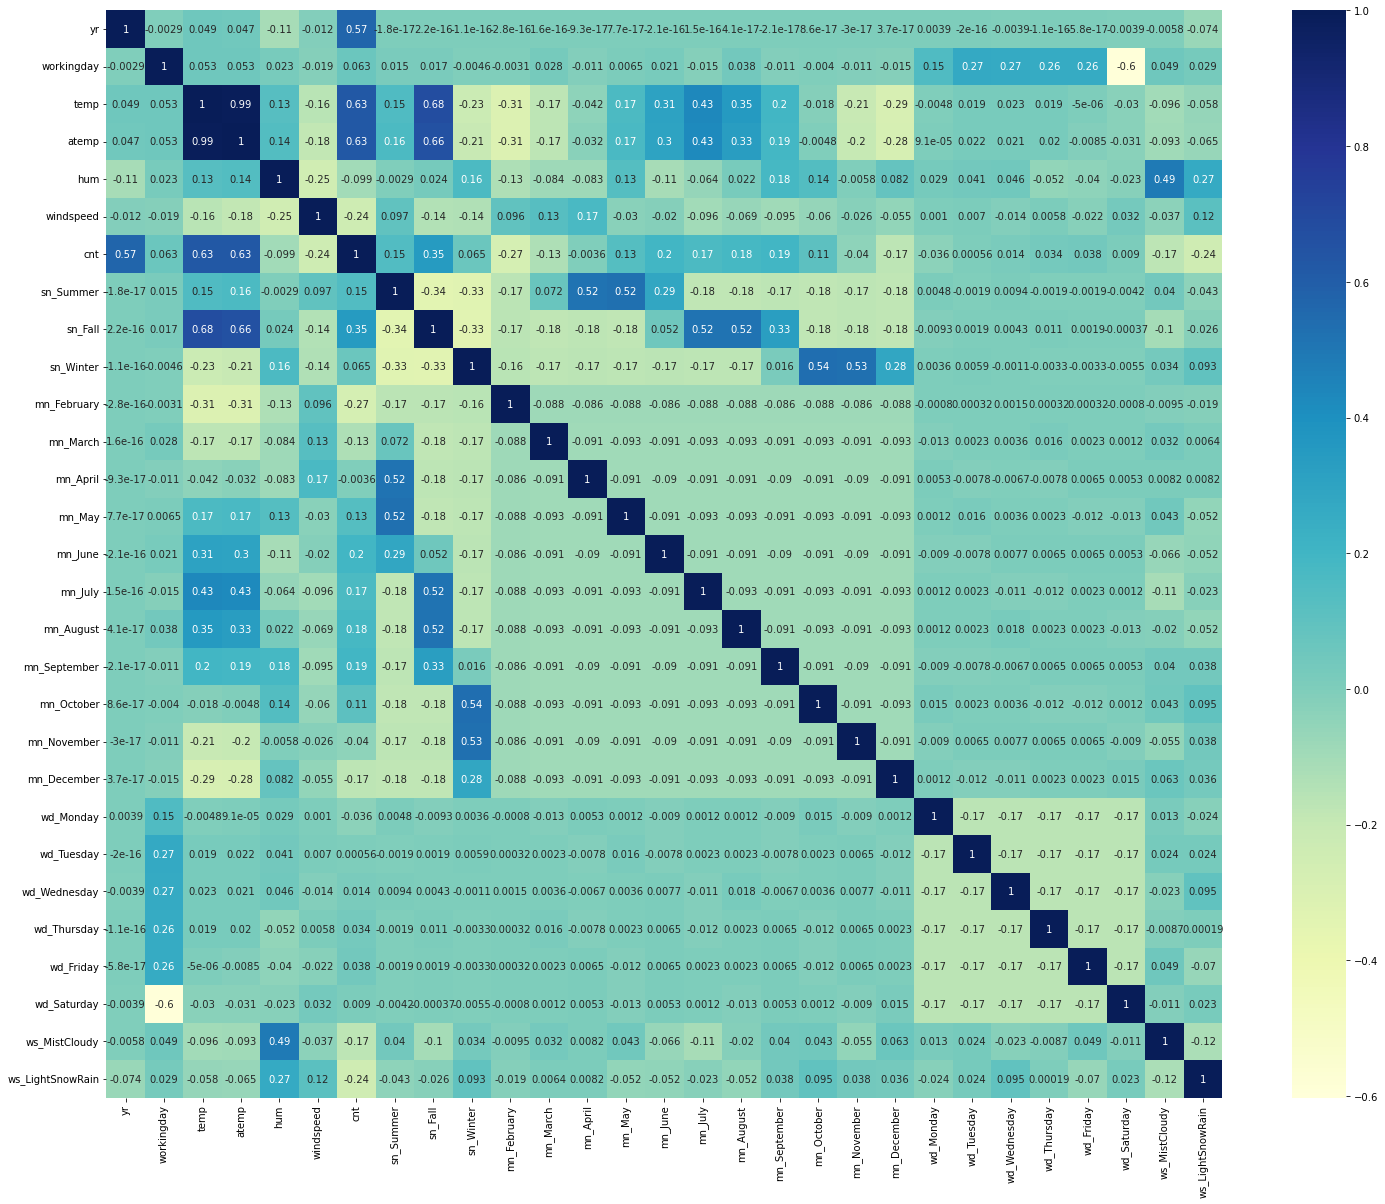

In [156]:
plt.figure(figsize = (25,20))
sns.heatmap(cleanset.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Preparing for Train and Test Data sets

In [157]:
bike_train, bike_test = train_test_split(cleanset, train_size = 0.7, random_state = 100)

In [158]:
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


### Scaling the predictors (using Normalization)

In [159]:
#Scaling
scaler = MinMaxScaler()
scale_vars = ['temp','atemp','hum','windspeed','cnt']
bike_train[scale_vars] = scaler.fit_transform(bike_train[scale_vars])
bike_train.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,sn_Summer,sn_Fall,sn_Winter,...,mn_November,mn_December,wd_Monday,wd_Tuesday,wd_Wednesday,wd_Thursday,wd_Friday,wd_Saturday,ws_MistCloudy,ws_LightSnowRain
576,1,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [160]:
bike_train.describe()

,yr,workingday,temp,atemp,hum,windspeed,cnt,sn_Summer,sn_Fall,sn_Winter,...,mn_November,mn_December,wd_Monday,wd_Tuesday,wd_Wednesday,wd_Thursday,wd_Friday,wd_Saturday,ws_MistCloudy,ws_LightSnowRain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,0.247059,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,0.431725,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [161]:
# getting X_train and y_train
y_train = bike_train.pop('cnt')
X_train = bike_train

In [162]:
print(X_train.shape)

(510, 28)


### recursive feature elimination (RFE)

In [163]:
# We have 28 columns. We will begin with 25 of them
linreg = LinearRegression()
linreg.fit(X_train, y_train)
rfe = RFE(linreg, n_features_to_select = 25)
rfe = rfe.fit(X_train, y_train)

In [164]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('sn_Summer', True, 1),
 ('sn_Fall', True, 1),
 ('sn_Winter', True, 1),
 ('mn_February', True, 1),
 ('mn_March', True, 1),
 ('mn_April', True, 1),
 ('mn_May', True, 1),
 ('mn_June', True, 1),
 ('mn_July', False, 2),
 ('mn_August', True, 1),
 ('mn_September', True, 1),
 ('mn_October', True, 1),
 ('mn_November', False, 3),
 ('mn_December', False, 4),
 ('wd_Monday', True, 1),
 ('wd_Tuesday', True, 1),
 ('wd_Wednesday', True, 1),
 ('wd_Thursday', True, 1),
 ('wd_Friday', True, 1),
 ('wd_Saturday', True, 1),
 ('ws_MistCloudy', True, 1),
 ('ws_LightSnowRain', True, 1)]

### Building Model: Iteration 1

#### ***The coefficients, P-values , R2  and R2 -adj***

In [165]:
cols = X_train.columns[rfe.support_]
X_train_rfe =  X_train[cols]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.8
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          3.45e-183
Time:                        23:26:53   Log-Likelihood:                 526.76
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1789      0.030      5.946      0.000       0.120       0.238
yr                   0.2320      0.008     28.909      0.000       0.216       0.248
workingday           0.0852      0.026      3.236      0.001       0.033       0.137
temp                 0.4052      0.137      2.953      0.003       0.136       0.675
atemp                0.0576      0.138      0.418      0.676      -0.213       0.328
hum                 -0.1539      0.038     -4.053      0.000      -0.228      -0.079
windspeed           -0.1824      0.026     -6.981      0.000      -0.234      -0.131
sn_Summer            0.0943      0.022      4.335      0.000       0.052       0.137
sn_Fall              0.0586      0.024      2.440      0.015       0.011       0.106
sn_Winter            0.1664      0.016     10.612      0.000       0.136       0.197
mn_February          0.0243      0.019      1.276      0.203      -0.013       0.062
mn_March             0.0539      0.018      3.020      0.003       0.019       0.089
mn_April             0.0468      0.026      1.799      0.073      -0.004       0.098
mn_May               0.0703      0.026      2.658      0.008       0.018       0.122
mn_June              0.0462      0.023      2.034      0.043       0.002       0.091
mn_August            0.0579      0.018      3.196      0.001       0.022       0.093
mn_September         0.1240      0.017      7.114      0.000       0.090       0.158
mn_October           0.0470      0.017      2.684      0.008       0.013       0.081
wd_Monday           -0.0521      0.027     -1.926      0.055      -0.105       0.001
wd_Tuesday          -0.0487      0.030     -1.610      0.108      -0.108       0.011
wd_Wednesday        -0.0362      0.030     -1.210      0.227      -0.095       0.023
wd_Thursday         -0.0400      0.030     -1.354      0.176      -0.098       0.018
wd_Friday           -0.0302      0.030     -1.005      0.315      -0.089       0.029
wd_Saturday          0.0542      0.014      3.737      0.000       0.026       0.083
ws_MistCloudy       -0.0595      0.010     -5.731      0.000      -0.080      -0.039
ws_LightSnowRain    -0.2544      0.026     -9.649      0.000      -0.306      -0.203
==============================================================================
Omnibus:                       82.174   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.894
Skew:                          -0.790   Prob(JB):                     2.41e-49
Kurtosis:                       5.836   Cond. No.                         90.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### ***The VIF***

In [166]:
#vif
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
3,temp,62.51
0,const,59.03
4,atemp,55.73
2,workingday,9.89
20,wd_Wednesday,7.79
8,sn_Fall,7.29
19,wd_Tuesday,6.81
21,wd_Thursday,6.60
22,wd_Friday,6.55
18,wd_Monday,6.11


---
#### Insight
| P-Value(>0.05) | VIF (>5)        | Remark                 |
| -------------- | --------------- | --------------------   |
| HIGH           | LOW             | atemp, mn_February     |
| HIGH           | HIGH            | wd_Wednesday,wd_Friday | 

- R2     = 0.852
- R2-adj = 0.845

---

### Building Model: Iteration 2 (drop the *atemp* column)

In [167]:
# let;s drop the 'atemp' column
X_train_rfe2 = X_train_rfe.drop('atemp', axis = 1)
X_train_rfe2 = sm.add_constant(X_train_rfe2)
lm = sm.OLS(y_train, X_train_rfe2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.6
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          3.45e-184
Time:                        23:27:27   Log-Likelihood:                 526.67
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     485   BIC:                            -897.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1793      0.030      5.972      0.000       0.120       0.238
yr                   0.2319      0.008     28.933      0.000       0.216       0.248
workingday           0.0858      0.026      3.270      0.001       0.034       0.137
temp                 0.4605      0.037     12.489      0.000       0.388       0.533
hum                 -0.1532      0.038     -4.042      0.000      -0.228      -0.079
windspeed           -0.1847      0.026     -7.238      0.000      -0.235      -0.135
sn_Summer            0.0942      0.022      4.336      0.000       0.052       0.137
sn_Fall              0.0577      0.024      2.415      0.016       0.011       0.105
sn_Winter            0.1666      0.016     10.645      0.000       0.136       0.197
mn_February          0.0244      0.019      1.285      0.199      -0.013       0.062
mn_March             0.0540      0.018      3.031      0.003       0.019       0.089
mn_April             0.0474      0.026      1.826      0.068      -0.004       0.098
mn_May               0.0701      0.026      2.655      0.008       0.018       0.122
mn_June              0.0457      0.023      2.015      0.044       0.001       0.090
mn_August            0.0570      0.018      3.171      0.002       0.022       0.092
mn_September         0.1240      0.017      7.117      0.000       0.090       0.158
mn_October           0.0470      0.017      2.688      0.007       0.013       0.081
wd_Monday           -0.0525      0.027     -1.945      0.052      -0.106       0.001
wd_Tuesday          -0.0493      0.030     -1.634      0.103      -0.109       0.010
wd_Wednesday        -0.0369      0.030     -1.236      0.217      -0.095       0.022
wd_Thursday         -0.0405      0.030     -1.373      0.171      -0.099       0.017
wd_Friday           -0.0313      0.030     -1.047      0.296      -0.090       0.027
wd_Saturday          0.0542      0.014      3.740      0.000       0.026       0.083
ws_MistCloudy       -0.0595      0.010     -5.742      0.000      -0.080      -0.039
ws_LightSnowRain    -0.2553      0.026     -9.721      0.000      -0.307      -0.204
==============================================================================
Omnibus:                       81.471   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.542
Skew:                          -0.784   Prob(JB):                     7.81e-49
Kurtosis:                       5.823   Cond. No.                         30.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
#vif
vif = pd.DataFrame()
vif['features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values,i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
0,const,58.94
2,workingday,9.85
19,wd_Wednesday,7.77
7,sn_Fall,7.24
18,wd_Tuesday,6.79
20,wd_Thursday,6.59
21,wd_Friday,6.50
17,wd_Monday,6.10
6,sn_Summer,5.74
3,temp,4.52


---
#### Insight

- R2 / R2-adj still holding good, after the drop of ***atemp***
- R2     = 0.852
- R2-adj = 0.845

| P-Value(>0.05) | VIF (>5)        | Remark                |
| -------------- | --------------- | --------------------  |
| HIGH (0.296)   | HIGH (6.50)     | wd_Friday,            |

---

### Building Model: Iteration 3 (drop the *wd_Friday* column)

In [173]:
# let;s drop the 'wd_Friday' column
X_train_rfe3 = X_train_rfe2.drop('wd_Friday', axis = 1)
X_train_rfe3 = sm.add_constant(X_train_rfe3)
lm = sm.OLS(y_train, X_train_rfe3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.6
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          5.32e-185
Time:                        23:40:06   Log-Likelihood:                 526.09
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     486   BIC:                            -902.6
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1743      0.030      5.879      0.000       0.116       0.233
yr                   0.2322      0.008     28.993      0.000       0.216       0.248
workingday           0.0622      0.013      4.655      0.000       0.036       0.088
temp                 0.4589      0.037     12.457      0.000       0.387       0.531
hum                 -0.1513      0.038     -3.998      0.000      -0.226      -0.077
windspeed           -0.1848      0.026     -7.241      0.000      -0.235      -0.135
sn_Summer            0.0947      0.022      4.362      0.000       0.052       0.137
sn_Fall              0.0591      0.024      2.473      0.014       0.012       0.106
sn_Winter            0.1670      0.016     10.671      0.000       0.136       0.198
mn_February          0.0243      0.019      1.278      0.202      -0.013       0.062
mn_March             0.0551      0.018      3.095      0.002       0.020       0.090
mn_April             0.0479      0.026      1.845      0.066      -0.003       0.099
mn_May               0.0710      0.026      2.689      0.007       0.019       0.123
mn_June              0.0469      0.023      2.072      0.039       0.002       0.091
mn_August            0.0571      0.018      3.180      0.002       0.022       0.092
mn_September         0.1232      0.017      7.078      0.000       0.089       0.157
mn_October           0.0477      0.017      2.731      0.007       0.013       0.082
wd_Monday           -0.0282      0.014     -2.050      0.041      -0.055      -0.001
wd_Tuesday          -0.0219      0.015     -1.460      0.145      -0.051       0.008
wd_Wednesday        -0.0095      0.014     -0.662      0.508      -0.038       0.019
wd_Thursday         -0.0138      0.015     -0.930      0.353      -0.043       0.015
wd_Saturday          0.0580      0.014      4.135      0.000       0.030       0.086
ws_MistCloudy       -0.0598      0.010     -5.770      0.000      -0.080      -0.039
ws_LightSnowRain    -0.2549      0.026     -9.707      0.000      -0.306      -0.203
==============================================================================
Omnibus:                       85.265   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.338
Skew:                          -0.811   Prob(JB):                     2.90e-52
Kurtosis:                       5.922   Cond. No.                         22.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [172]:
#vif
vif = pd.DataFrame()
vif['features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
0,const,57.42
7,sn_Fall,7.22
6,sn_Summer,5.73
3,temp,4.51
12,mn_May,3.51
11,mn_April,3.18
8,sn_Winter,2.98
2,workingday,2.55
13,mn_June,2.37
4,hum,1.99


---
#### Insight

- R2 / R2-adj still holding good, after the drop of ***wd_Friday***
- R2     = 0.852
- R2-adj = 0.845
- next ***wd_Wednesday*** needs to be removed whose P-Value is highest : 0.508
---

### Building Model: Iteration 4 (drop the *wd_Wednesday* column)

In [174]:
# let;s drop the 'wd_Wednesday' column
X_train_rfe4 = X_train_rfe3.drop('wd_Wednesday', axis = 1)
X_train_rfe4 = sm.add_constant(X_train_rfe4)
lm = sm.OLS(y_train, X_train_rfe4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     127.3
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          5.78e-186
Time:                        23:40:35   Log-Likelihood:                 525.86
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     487   BIC:                            -908.3
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1741      0.030      5.877      0.000       0.116       0.232
yr                   0.2322      0.008     29.006      0.000       0.216       0.248
workingday           0.0578      0.012      4.983      0.000       0.035       0.081
temp                 0.4586      0.037     12.456      0.000       0.386       0.531
hum                 -0.1522      0.038     -4.024      0.000      -0.226      -0.078
windspeed           -0.1849      0.026     -7.249      0.000      -0.235      -0.135
sn_Summer            0.0948      0.022      4.369      0.000       0.052       0.137
sn_Fall              0.0597      0.024      2.506      0.013       0.013       0.107
sn_Winter            0.1671      0.016     10.681      0.000       0.136       0.198
mn_February          0.0244      0.019      1.283      0.200      -0.013       0.062
mn_March             0.0552      0.018      3.105      0.002       0.020       0.090
mn_April             0.0480      0.026      1.849      0.065      -0.003       0.099
mn_May               0.0710      0.026      2.691      0.007       0.019       0.123
mn_June              0.0466      0.023      2.061      0.040       0.002       0.091
mn_August            0.0569      0.018      3.171      0.002       0.022       0.092
mn_September         0.1226      0.017      7.058      0.000       0.088       0.157
mn_October           0.0481      0.017      2.757      0.006       0.014       0.082
wd_Monday           -0.0238      0.012     -1.979      0.048      -0.047      -0.000
wd_Tuesday          -0.0169      0.013     -1.304      0.193      -0.042       0.009
wd_Thursday         -0.0089      0.013     -0.692      0.489      -0.034       0.016
wd_Saturday          0.0586      0.014      4.192      0.000       0.031       0.086
ws_MistCloudy       -0.0594      0.010     -5.744      0.000      -0.080      -0.039
ws_LightSnowRain    -0.2561      0.026     -9.779      0.000      -0.308      -0.205
==============================================================================
Omnibus:                       85.125   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              237.798
Skew:                          -0.809   Prob(JB):                     2.31e-52
Kurtosis:                       5.928   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
#vif
vif = pd.DataFrame()
vif['features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values,i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
0,const,57.41
7,sn_Fall,7.20
6,sn_Summer,5.73
3,temp,4.51
12,mn_May,3.51
11,mn_April,3.18
8,sn_Winter,2.98
13,mn_June,2.36
4,hum,1.99
2,workingday,1.93


---
#### Insight

- R2 / R2-adj still holding good, after the drop of ***wd_Wednesday***
- R2     = 0.852
- R2-adj = 0.845
- next ***wd_Thursday*** needs to be removed whose P-Value is highest : 0.489
---

### Building Model: Iteration 5 (drop the *wd_Thursday* column)

In [176]:
# let;s drop the 'wd_Thursday' column
X_train_rfe5 = X_train_rfe4.drop('wd_Thursday', axis = 1)
X_train_rfe5 = sm.add_constant(X_train_rfe5)
lm = sm.OLS(y_train, X_train_rfe5).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     133.5
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          6.27e-187
Time:                        23:44:26   Log-Likelihood:                 525.61
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     488   BIC:                            -914.1
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1732      0.030      5.855      0.000       0.115       0.231
yr                   0.2322      0.008     29.025      0.000       0.216       0.248
workingday           0.0556      0.011      4.987      0.000       0.034       0.077
temp                 0.4587      0.037     12.467      0.000       0.386       0.531
hum                 -0.1518      0.038     -4.017      0.000      -0.226      -0.078
windspeed           -0.1850      0.025     -7.260      0.000      -0.235      -0.135
sn_Summer            0.0948      0.022      4.368      0.000       0.052       0.137
sn_Fall              0.0597      0.024      2.506      0.013       0.013       0.107
sn_Winter            0.1668      0.016     10.674      0.000       0.136       0.198
mn_February          0.0248      0.019      1.305      0.193      -0.013       0.062
mn_March             0.0551      0.018      3.099      0.002       0.020       0.090
mn_April             0.0483      0.026      1.864      0.063      -0.003       0.099
mn_May               0.0713      0.026      2.707      0.007       0.020       0.123
mn_June              0.0469      0.023      2.075      0.039       0.002       0.091
mn_August            0.0570      0.018      3.177      0.002       0.022       0.092
mn_September         0.1224      0.017      7.052      0.000       0.088       0.157
mn_October           0.0487      0.017      2.798      0.005       0.015       0.083
wd_Monday           -0.0214      0.011     -1.859      0.064      -0.044       0.001
wd_Tuesday          -0.0143      0.012     -1.151      0.250      -0.039       0.010
wd_Saturday          0.0591      0.014      4.237      0.000       0.032       0.087
ws_MistCloudy       -0.0590      0.010     -5.720      0.000      -0.079      -0.039
ws_LightSnowRain    -0.2563      0.026     -9.794      0.000      -0.308      -0.205
==============================================================================
Omnibus:                       86.595   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.781
Skew:                          -0.819   Prob(JB):                     7.02e-54
Kurtosis:                       5.973   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [177]:
#vif
vif = pd.DataFrame()
vif['features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values,i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
0,const,57.29
7,sn_Fall,7.20
6,sn_Summer,5.73
3,temp,4.51
12,mn_May,3.51
11,mn_April,3.18
8,sn_Winter,2.98
13,mn_June,2.36
4,hum,1.99
10,mn_March,1.83


### Building Model: Iteration 6 (drop the *wd_Tuesday* column)

In [179]:
# let;s drop the 'wd_Tuesday' column
X_train_rfe6 = X_train_rfe5.drop('wd_Tuesday', axis = 1)
X_train_rfe6 = sm.add_constant(X_train_rfe6)
lm = sm.OLS(y_train, X_train_rfe6).fit()
print(lm.summary())
#vif
vif = pd.DataFrame()
vif['features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values,i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.0
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          1.01e-187
Time:                        23:49:26   Log-Likelihood:                 524.92
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     489   BIC:                            -918.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1744      0.030  

### Building Model: Iteration 7 (drop the mn_February column)

In [180]:
# let;s drop the 'mn_February' column
X_train_rfe7 = X_train_rfe6.drop('mn_February', axis = 1)
X_train_rfe7 = sm.add_constant(X_train_rfe7)
lm = sm.OLS(y_train, X_train_rfe7).fit()
print(lm.summary())
#vif
vif = pd.DataFrame()
vif['features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values,i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.1
Date:                Mon, 13 Mar 2023   Prob (F-statistic):          1.76e-188
Time:                        23:57:44   Log-Likelihood:                 524.11
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     490   BIC:                            -923.5
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1834      0.029  

### Building Model: Iteration 8 (drop the wd_Monday column)

In [181]:
# let;s drop the 'wd_Monday' column
X_train_rfe8 = X_train_rfe7.drop('wd_Monday', axis = 1)
X_train_rfe8 = sm.add_constant(X_train_rfe8)
lm = sm.OLS(y_train, X_train_rfe8).fit()
print(lm.summary())
#vif
vif = pd.DataFrame()
vif['features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values,i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     154.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          5.39e-189
Time:                        00:00:30   Log-Likelihood:                 522.70
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     491   BIC:                            -926.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1824      0.029  

### Building Model: Iteration 9 (drop the mn_April column)

In [182]:
# let;s drop the 'mn_April' column
X_train_rfe9 = X_train_rfe8.drop('mn_April', axis = 1)
X_train_rfe9 = sm.add_constant(X_train_rfe9)
lm = sm.OLS(y_train, X_train_rfe9).fit()
print(lm.summary())
#vif
vif = pd.DataFrame()
vif['features'] = X_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe9.values,i) for i in range(X_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     162.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.65e-189
Time:                        00:02:49   Log-Likelihood:                 521.26
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     492   BIC:                            -930.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1860      0.029  

### Building Model: Iteration 10 (drop the mn_June column)

In [183]:
# let;s drop the 'mn_June' column
X_train_rfe10 = X_train_rfe9.drop('mn_June', axis = 1)
X_train_rfe10 = sm.add_constant(X_train_rfe10)
lm = sm.OLS(y_train, X_train_rfe10).fit()
print(lm.summary())
#vif
vif = pd.DataFrame()
vif['features'] = X_train_rfe10.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe10.values,i) for i in range(X_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     172.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.54e-190
Time:                        00:05:12   Log-Likelihood:                 520.51
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     493   BIC:                            -935.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1854      0.029  

### Building Model: Iteration 11 (drop the mn_May column)

In [185]:
# let;s drop the 'mn_May' column
X_train_rfe11 = X_train_rfe10.drop('mn_May', axis = 1)
X_train_rfe11 = sm.add_constant(X_train_rfe11)
lm = sm.OLS(y_train, X_train_rfe11).fit()
print(lm.summary())
#vif
vif = pd.DataFrame()
vif['features'] = X_train_rfe11.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe11.values,i) for i in range(X_train_rfe11.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          6.90e-191
Time:                        00:07:26   Log-Likelihood:                 519.14
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     494   BIC:                            -938.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1798      0.029  

### Building Model: Iteration 12 (drop the sn_Fall column)

In [186]:
# let;s drop the 'sn_Fall' column
X_train_rfe12 = X_train_rfe11.drop('sn_Fall', axis = 1)
X_train_rfe12 = sm.add_constant(X_train_rfe12)
lm = sm.OLS(y_train, X_train_rfe12).fit()
print(lm.summary())
#vif
vif = pd.DataFrame()
vif['features'] = X_train_rfe12.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe12.values,i) for i in range(X_train_rfe12.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.19e-191
Time:                        00:09:39   Log-Likelihood:                 517.57
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1800      0.029  

### Building Model: Iteration 13 (drop the mn_March column)

In [187]:
# let;s drop the 'mn_March' column
X_train_rfe13 = X_train_rfe12.drop('mn_March', axis = 1)
X_train_rfe13 = sm.add_constant(X_train_rfe13)
lm = sm.OLS(y_train, X_train_rfe13).fit()
print(lm.summary())
#vif
vif = pd.DataFrame()
vif['features'] = X_train_rfe13.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe13.values,i) for i in range(X_train_rfe13.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     210.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          4.92e-192
Time:                        00:11:27   Log-Likelihood:                 516.33
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     496   BIC:                            -945.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1850      0.028  

---
#### Insight

- After 13 Iterations, we have reached a decent model, where
- **We are down to 13 independent predictors having low P-value (<0.05)**
- **Their individual VIF's are within acceptable range of <5. There is No Multicollinearity between the predictor variables**
- **R<sup>2</sup>**: 0.846 and  **R<sup>2</sup>-adj**: 0.842 is pretty good showing that more than **80%** variation of the dependent variable {cnt} is explained by the independent variables, selected in the model
---

## Final Model Interpretation

### Residual Analysis

<AxesSubplot:ylabel='Density'>

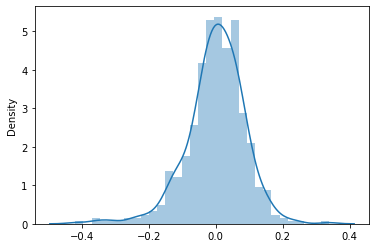

In [188]:
y_train_pred = lm.predict(X_train_rfe13)
res = y_train - y_train_pred
sns.distplot(res)

---
#### Insight
- **The residual distribution plot represent the normal distribution curve, spread around μ = 0.0**
- **Error terms are normally distributed with mean zero. Hence our assumption for Linear Regression is valid.**
---

### Hypothesis Testing

##### Hypothesis testing states that:

- **H0**: B1=B2=...=Bn=0
- **H1**: at least one Bi <> 0

> Examining the coefficients of the final model

|                   |    coef    |
|-------------------|---------   |
|const              | **0.1850** |
|yr                 | **0.2294** |
|workingday         | **0.0525** |
|temp               | **0.5325** |
|hum                | **-0.1698**|
|windspeed          | **-0.1866**|
|sn_Summer          | **0.1056** |
|sn_Winter          | **0.1341** |
|mn_August          | **0.0561** |
|mn_September       | **0.1235** |
|mn_October         | **0.0398** |
|wd_Saturday        | **0.0611** |
|ws_MistCloudy      | **-0.0565**| 
|ws_LightSnowRain   | **-0.2462**|

-- it is evident that all our coefficients are not equal to zerowhich means we **REJECT the NULL HYPOTHESIS**

## FINAL MODEL & Coefficients

y = β<sub>0</sub> + β<sub>1</sub>x<sub>1</sub> + β<sub>2</sub>x<sub>2</sub> + ... + + β<sub>n</sub>x<sub>n</sub> + ϵ
- where
    - **y**: dependent variable
    - **x<sub>n</sub>**:explanatory variables
    - **β<sub>0</sub>**: y-intercept (constant)
    - **β<sub>n</sub>**: slope coefficients of each explanatory variable
    - **ϵ**: model's error terms (a.k.a residuals)

#### {cnt} = 0.1850 + 0.2294{yr} + 0.0525{workingday} + 0.5325{temp} - 0.1698{hum} - 0.1866{windspeed} +0.1056{sn_Summer} + 0.1341{sn_Winter} + 0.0398{mn_August} + 0.1235{mn_September} + 0.0398{mn_October} + 0.0611{wd_Saturday} - 0.0565{ws_MistCloudy} - 0.2462{ws_LightSnowRain}

## MAKING PREDICTION USING FINAL MODEL

In [190]:
# Scaling the predictor variables and using only transform
scale_vars = ['temp','atemp','hum','windspeed','cnt']
bike_test[scale_vars] = scaler.transform(bike_test[scale_vars])
bike_test.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,sn_Summer,sn_Fall,sn_Winter,...,mn_November,mn_December,wd_Monday,wd_Tuesday,wd_Wednesday,wd_Thursday,wd_Friday,wd_Saturday,ws_MistCloudy,ws_LightSnowRain
184,0,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [191]:
bike_test.describe()

,yr,workingday,temp,atemp,hum,windspeed,cnt,sn_Summer,sn_Fall,sn_Winter,...,mn_November,mn_December,wd_Monday,wd_Tuesday,wd_Wednesday,wd_Thursday,wd_Friday,wd_Saturday,ws_MistCloudy,ws_LightSnowRain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.318182,0.027273
std,0.500809,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.466833,0.163248
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [198]:
# getting X_test and y_test
y_test = bike_test.pop('cnt')
X_test = bike_test

KeyError: 'cnt'

In [196]:
X_train_rfe13.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'sn_Summer',
       'sn_Winter', 'mn_August', 'mn_September', 'mn_October', 'wd_Saturday',
       'ws_MistCloudy', 'ws_LightSnowRain'],
      dtype='object')

In [197]:
# taking the final set of columns from the FINAL MODEL

cols = ['yr', 'workingday', 'temp', 'hum', 'windspeed', 'sn_Summer',
       'sn_Winter', 'mn_August', 'mn_September', 'mn_October', 'wd_Saturday',
       'ws_MistCloudy', 'ws_LightSnowRain']
X_test_rfe =  X_test[cols]
X_test_rfe = sm.add_constant(X_test_rfe)
lm = sm.OLS(y_test, X_test_rfe).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     79.01
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           1.61e-72
Time:                        09:02:44   Log-Likelihood:                 219.12
No. Observations:                 220   AIC:                            -410.2
Df Residuals:                     206   BIC:                            -362.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2119      0.048      4.432      0.000       0.118       0.306
yr                   0.2253      0.013     17.196      0.000       0.199       0.251
workingday           0.0285      0.017      1.698      0.091      -0.005       0.062
temp                 0.5484      0.032     17.076      0.000       0.485       0.612
hum                 -0.2592      0.064     -4.080      0.000      -0.384      -0.134
windspeed           -0.0939      0.044     -2.128      0.035      -0.181      -0.007
sn_Summer            0.0991      0.016      6.022      0.000       0.067       0.132
sn_Winter            0.1242      0.020      6.281      0.000       0.085       0.163
mn_August            0.0393      0.030      1.312      0.191      -0.020       0.098
mn_September         0.1238      0.025      4.877      0.000       0.074       0.174
mn_October           0.1056      0.028      3.799      0.000       0.051       0.160
wd_Saturday          0.0546      0.024      2.323      0.021       0.008       0.101
ws_MistCloudy       -0.0320      0.018     -1.797      0.074      -0.067       0.003
ws_LightSnowRain    -0.1342      0.047     -2.861      0.005      -0.227      -0.042
==============================================================================
Omnibus:                       19.430   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.452
Skew:                          -0.647   Prob(JB):                     8.08e-06
Kurtosis:                       3.940   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [199]:
#vif
vif = pd.DataFrame()
vif['features'] = X_test_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_test_rfe.values,i) for i in range(X_test_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,features,VIF
0,const,58.95
4,hum,2.29
7,sn_Winter,1.82
12,ws_MistCloudy,1.77
10,mn_October,1.57
2,workingday,1.52
13,ws_LightSnowRain,1.50
11,wd_Saturday,1.49
3,temp,1.44
6,sn_Summer,1.36


<AxesSubplot:ylabel='Density'>

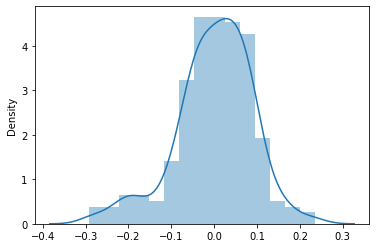

In [200]:
# Making predictions using the final model (X_train_rfe13)

y_test_pred = lm.predict(X_test_rfe)

res = y_test - y_test_pred
sns.distplot(res)

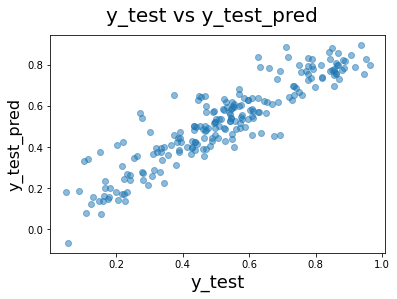

In [201]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

In [202]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8329480794552621

### Final Result Comparison

|                      | Train          | Test             |
| ---------------------| ---------------| -----------------|
|R<sup>2</sup>         | 0.846          | 0.822            |
|Adjusted R<sup>2</sup>| 0.842          | 0.833            |

**This seems to be a really good model that can very well 'Generalize' various datasets**

---
## FINAL REPORT

- The bike hire increases by **0.23 units** as an year on year growth
- The ***Working Day*** and ***Temperature*** impact the bikes being hired.
- The seasons of ***Summer*** and ***Winter*** impact the bikes being hired.
- The months of ***August***, ***September*** and ***October*** impact the bikes being hired.
- The weekday of ***Saturday*** impact the bikes being hired.
- The following climatic / weather condition impact the bikes being hired, **NEGATIVELY**
    - Humidity and Windspeed
    - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    
---